In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from typing import Tuple, Dict, List, Set, Optional, Any
load_dotenv()

True

In [4]:
root = "./excel/data.xlsx"

### Getting all data

In [61]:
users_df = pd.read_excel(root, sheet_name="users")
clients_df = pd.read_excel(root, sheet_name="clients")
client_equipment_df = pd.read_excel(root, sheet_name="client_equipment")
failure_types_df = pd.read_excel(root, sheet_name="failure_types")
equipment_failures_df = pd.read_excel(root, sheet_name="equipment_failures")
maintenance_types_df = pd.read_excel(root, sheet_name="maintenance_types")
maintenance_order_df = pd.read_excel(root, sheet_name="maintenance_order")
inspections_df = pd.read_excel(root, sheet_name="inspections")


### Users Details

In [62]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           22 non-null     object 
 1   first_name   22 non-null     object 
 2   last_name    22 non-null     object 
 3   email        22 non-null     object 
 4   phone        22 non-null     object 
 5   gender       22 non-null     object 
 6   address      22 non-null     object 
 7   password     22 non-null     object 
 8   role         22 non-null     object 
 9   hourly_rate  22 non-null     float64
 10  is_active    22 non-null     bool   
 11  created_at   22 non-null     object 
 12  updated_at   22 non-null     object 
dtypes: bool(1), float64(1), object(11)
memory usage: 2.2+ KB


1. Counts Users by role

In [ ]:
active_users = users_df["is_active"] == True #Filter active users
roles_counts = users_df.loc[active_users]["role"].value_counts().reset_index()
roles_counts.columns = ["Role", "Count"]
percent = [x for x in ((roles_counts["Count"] / roles_counts["Count"].sum())*100)]

users_by_roles = pd.DataFrame({
    "Roles": roles_counts["Role"],
    "Counts": roles_counts["Count"],
    "Percentage": percent
})
users_by_roles

,Roles,Counts,Percentage
0,Technician,10,62.5
1,Operator,4,25.0
2,Admin,2,12.5


2. Data Visualizations

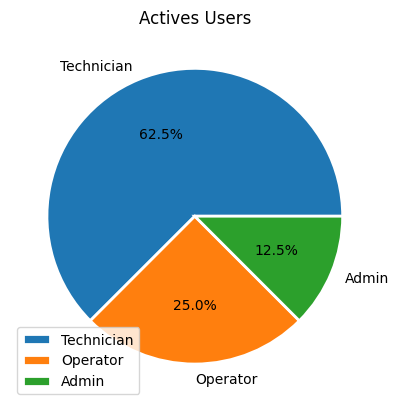

In [104]:
#Data
x: Any = users_by_roles["Roles"]
y = users_by_roles["Counts"]

#Pies charts
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct='%1.1f%%', wedgeprops={"linewidth":2,"edgecolor": "white"})
ax.legend()
plt.title('Actives Users')
plt.show()

### Clients Details

In [21]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           45 non-null     object
 1   first_name   45 non-null     object
 2   last_name    45 non-null     object
 3   email        45 non-null     object
 4   phone        45 non-null     object
 5   gender       45 non-null     object
 6   address      45 non-null     object
 7   client_type  45 non-null     object
 8   created_at   45 non-null     object
 9   updated_at   45 non-null     object
dtypes: object(10)
memory usage: 3.6+ KB


1. Counts Clients

In [109]:
client_counts = clients_df["client_type"].value_counts().reset_index()
client_counts.columns = ["Type_of_Clients", "Count"]
percent_clients = [x for x in ((client_counts["Count"] / client_counts["Count"].sum())* 100)]

clients_by_type = pd.DataFrame({
    "Type_of_Clients": client_counts["Type_of_Clients"],
    "Counts": client_counts["Count"],
    "Percentage": percent_clients
})
clients_by_type

,Type_of_Clients,Counts,Percentage
0,Residential,30,66.666667
1,Commercial,15,33.333333


2. Data Visualization

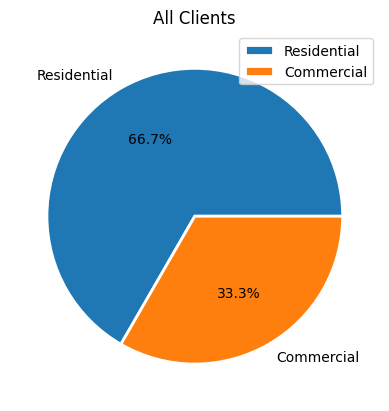

In [110]:
#Data
x: Any = clients_by_type["Type_of_Clients"]
y = clients_by_type["Counts"]

#Pies charts
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct='%1.1f%%', wedgeprops={"linewidth":2,"edgecolor": "white"})
ax.legend()
plt.title('All Clients')
plt.show()

1. Question: List the first names, last names, and email addresses of all clients whose client_type is 'Commercial'.

In [26]:
commercial_clients = clients_df["client_type"] == "Commercial"
clients_df.loc[commercial_clients, ["first_name","last_name","email"]]

,first_name,last_name,email
30,Empresa,Venezolana S.A.,empresavenezolana31@gmail.com
31,Comercial,Maracaibo C.A.,comercialmaracaibo32@hotmail.com
32,Industrias,Valencia Ltda.,industriasvalencia33@outlook.com
33,Servicios,Lara S.R.L.,servicioslara34@gmail.com
34,Constructora,Aragua C.A.,constructoraaragua35@hotmail.com
35,Exportadora,Anzoátegui S.A.,exportadoraanzoategui36@outlook.com
36,Minería,Bolívar C.A.,mineriabolivar37@gmail.com
37,Agroindustrial,Monagas S.R.L.,agroindustrialmonagas38@hotmail.com
38,Tecnología,Táchira Ltda.,tecnologiatachira39@outlook.com
39,Pesquera,Sucre C.A.,pesquerasucre40@gmail.com
